In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
# Load data
df = pd.read_csv('ecommerce_customer_data_custom_ratios.csv')
df_clean = df.dropna()

In [5]:
# Remove outliers
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.drop(['Customer ID', 'Churn'])
df_outliers_removed = df_clean.copy()
for col in numeric_cols:
    df_outliers_removed = remove_outliers_iqr(df_outliers_removed, col)

In [6]:
# Preprocess
df_model = df_outliers_removed.drop(columns=['Customer ID', 'Purchase Date', 'Customer Name'])
le = LabelEncoder()
for col in df_model.select_dtypes(include='object').columns:
    df_model[col] = le.fit_transform(df_model[col])


In [7]:
# Stratified sample
df_sampled = df_model.groupby('Churn', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))


C:\Users\User\AppData\Local\Temp\ipykernel_15224\3456566000.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_model.groupby('Churn', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))


In [8]:
# Split
X = df_sampled.drop(columns='Churn')
y = df_sampled['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Random Forest Report:\n", classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.7989130434782609
Random Forest Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.89      3241
           1       0.37      0.01      0.02       807

    accuracy                           0.80      4048
   macro avg       0.59      0.50      0.46      4048
weighted avg       0.72      0.80      0.72      4048



In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, knn_preds))
print("KNN Report:\n", classification_report(y_test, knn_preds))



KNN Accuracy: 0.7677865612648221
KNN Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      3241
           1       0.19      0.05      0.08       807

    accuracy                           0.77      4048
   macro avg       0.50      0.50      0.47      4048
weighted avg       0.68      0.77      0.71      4048



Decision Tree Accuracy: 0.6815711462450593
Decision Tree Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      3241
           1       0.23      0.25      0.24       807

    accuracy                           0.68      4048
   macro avg       0.52      0.52      0.52      4048
weighted avg       0.69      0.68      0.69      4048



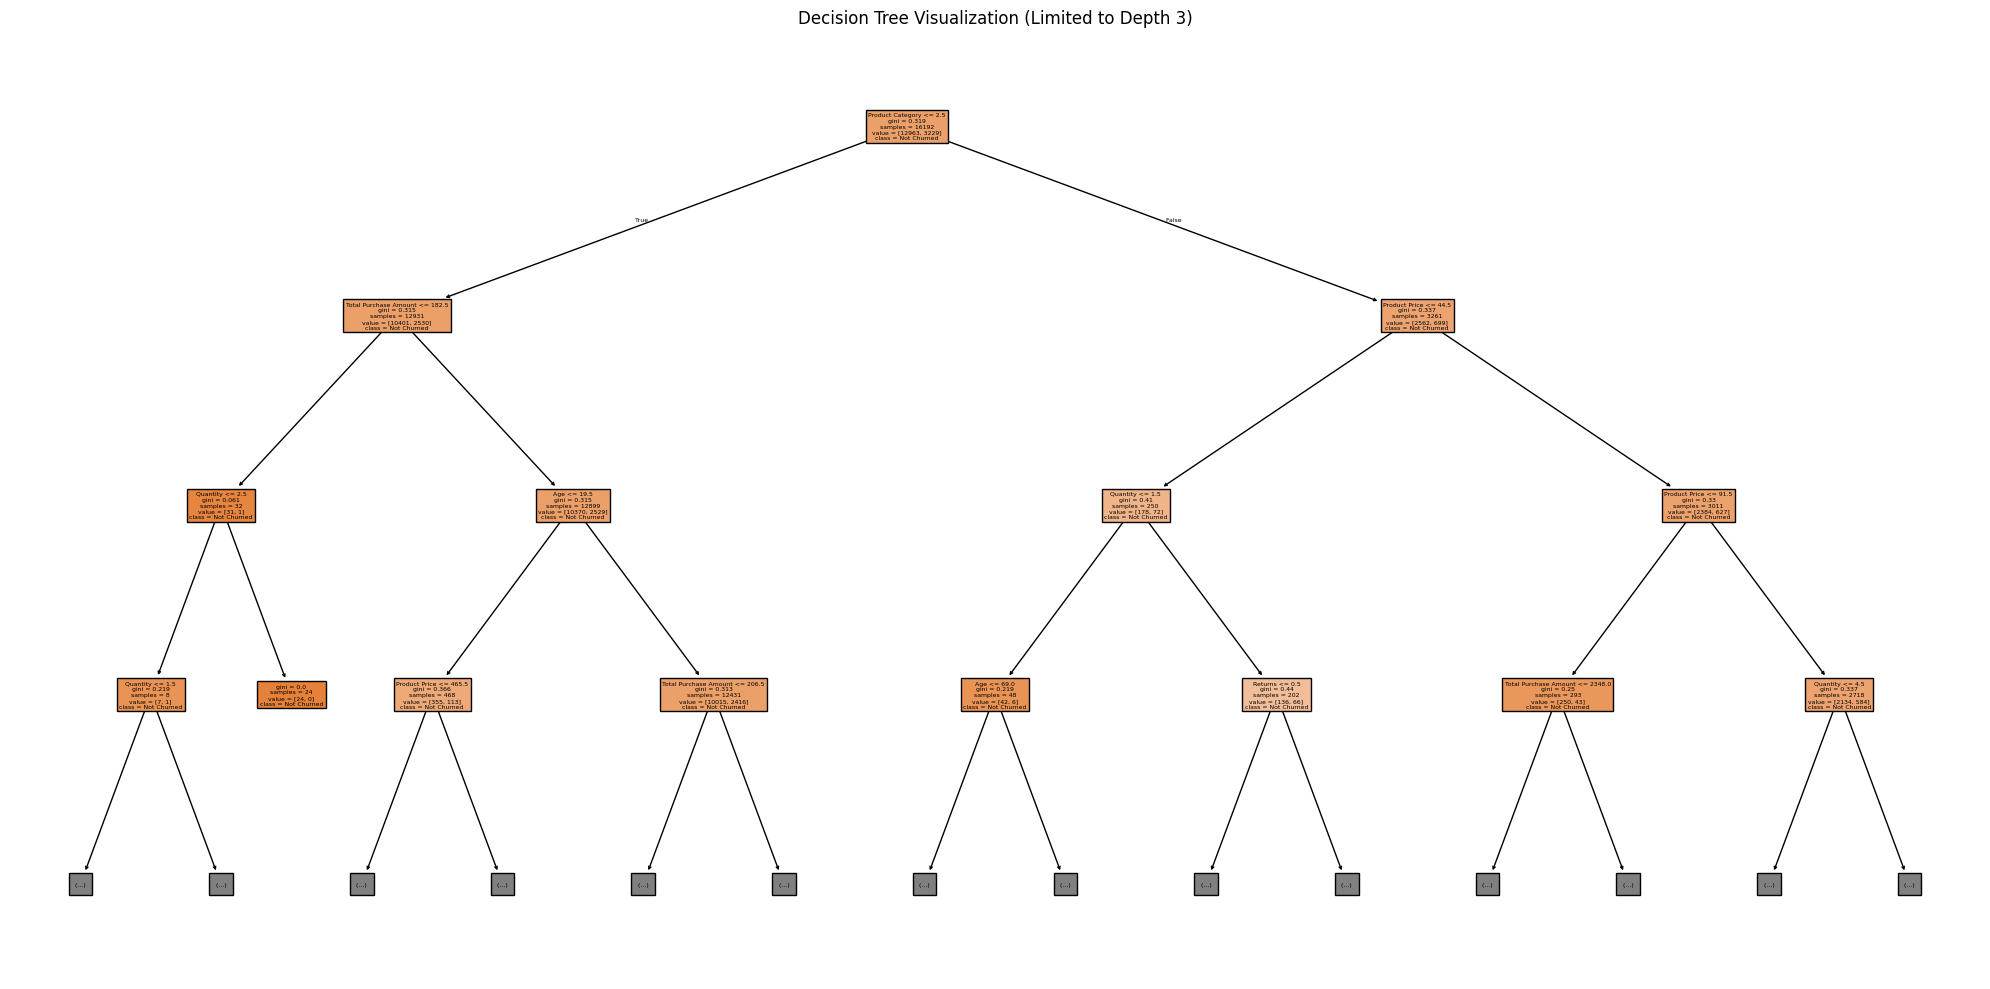

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print("Decision Tree Report:\n", classification_report(y_test, dt_preds))

# Plot the decision tree diagram
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Not Churned', 'Churned'], max_depth=3)
plt.title('Decision Tree Visualization (Limited to Depth 3)')
plt.tight_layout()
plt.show()


Logistic Regression Accuracy: 0.8006422924901185
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      3241
           1       0.00      0.00      0.00       807

    accuracy                           0.80      4048
   macro avg       0.40      0.50      0.44      4048
weighted avg       0.64      0.80      0.71      4048



c:\Users\User\Desktop\New folder (2)\-AI-Powered-Customer-Behavior-Prediction-for-E-Commerce\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\Desktop\New folder (2)\-AI-Powered-Customer-Behavior-Prediction-for-E-Commerce\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\Desktop\New folder (2)\-AI-Powered-Customer-Behavior-Prediction-for-E-Commerce\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and b

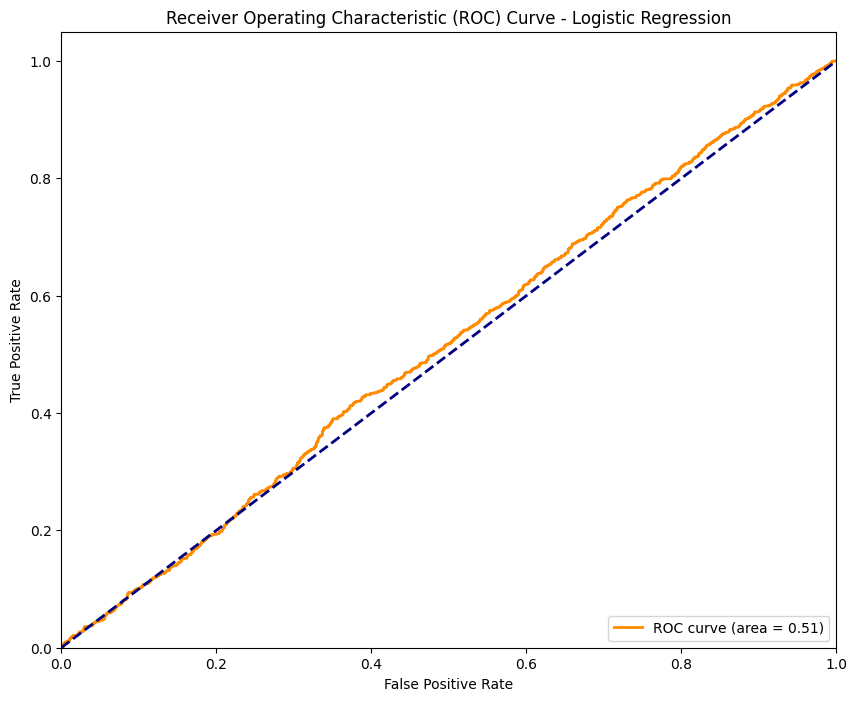

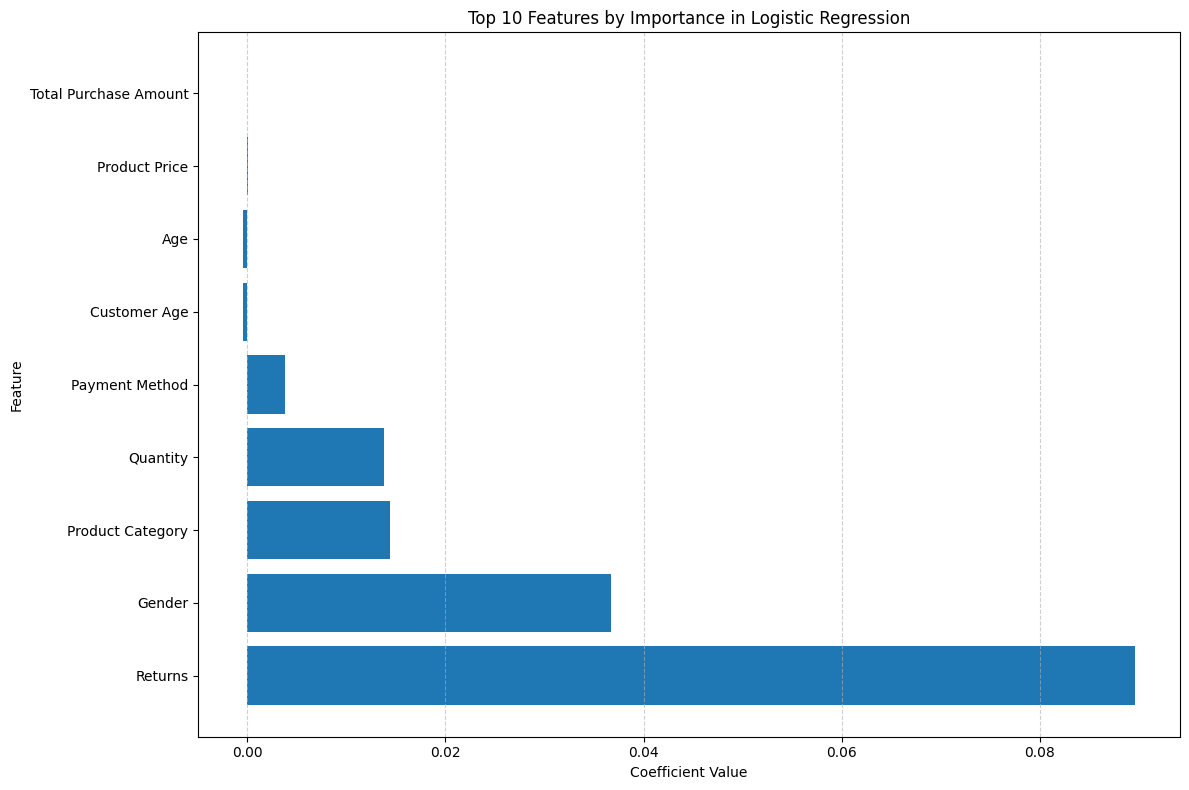

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Train Logistic Regression model
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_probs = lr.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print("Logistic Regression Report:\n", classification_report(y_test, lr_preds))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")

# Add feature importance visualization
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_[0]
})
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'][:10], feature_importance['Coefficient'][:10])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Features by Importance in Logistic Regression')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



Random Forest Accuracy: 0.7989130434782609
Random Forest Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.89      3241
           1       0.37      0.01      0.02       807

    accuracy                           0.80      4048
   macro avg       0.59      0.50      0.46      4048
weighted avg       0.72      0.80      0.72      4048


Gradient Boosting Accuracy: 0.8006422924901185
Gradient Boosting Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      3241
           1       0.00      0.00      0.00       807

    accuracy                           0.80      4048
   macro avg       0.40      0.50      0.44      4048
weighted avg       0.64      0.80      0.71      4048


Ensemble Accuracy: 0.8006422924901185
Ensemble Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      3241
           1       0.00      0.00     

c:\Users\User\Desktop\New folder (2)\-AI-Powered-Customer-Behavior-Prediction-for-E-Commerce\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\Desktop\New folder (2)\-AI-Powered-Customer-Behavior-Prediction-for-E-Commerce\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\Desktop\New folder (2)\-AI-Powered-Customer-Behavior-Prediction-for-E-Commerce\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and b

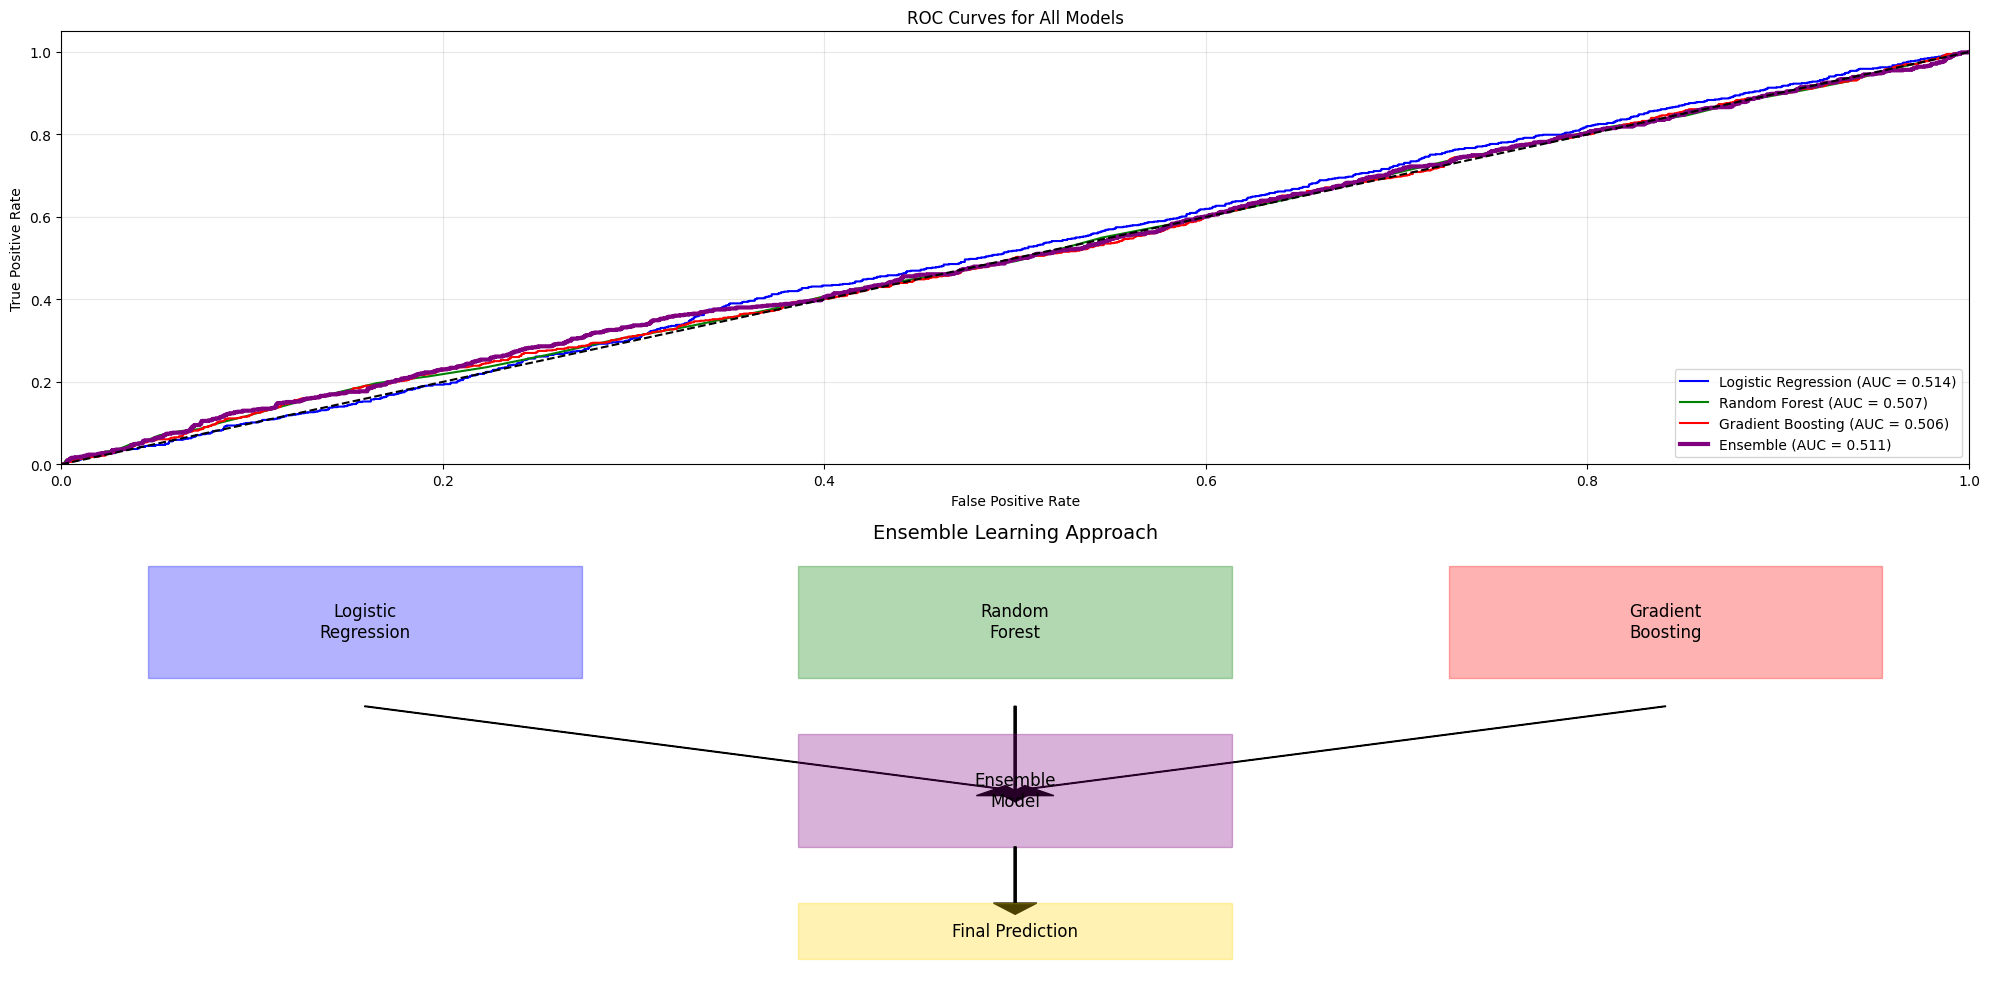

KeyboardInterrupt: 

In [13]:
# Ensemble Learning - Combining Multiple Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Train additional models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)
gb_probs = gb.predict_proba(X_test)[:, 1]

# Create a simple ensemble (averaging probabilities)
ensemble_probs = (lr_probs + rf_probs + gb_probs) / 3
ensemble_preds = (ensemble_probs >= 0.5).astype(int)

# Evaluate all models
print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Random Forest Report:\n", classification_report(y_test, rf_preds))

print("\nGradient Boosting Accuracy:", accuracy_score(y_test, gb_preds))
print("Gradient Boosting Report:\n", classification_report(y_test, gb_preds))

print("\nEnsemble Accuracy:", accuracy_score(y_test, ensemble_preds))
print("Ensemble Report:\n", classification_report(y_test, ensemble_preds))

# Calculate ROC curves for all models
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
gb_auc = auc(gb_fpr, gb_tpr)

ensemble_fpr, ensemble_tpr, _ = roc_curve(y_test, ensemble_probs)
ensemble_auc = auc(ensemble_fpr, ensemble_tpr)

# Create a visualization of the ensemble approach
fig = plt.figure(figsize=(20, 10))
gs = GridSpec(2, 3, figure=fig)

# ROC curves for all models
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.3f})', color='blue')
ax1.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.3f})', color='green')
ax1.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.3f})', color='red')
ax1.plot(ensemble_fpr, ensemble_tpr, label=f'Ensemble (AUC = {ensemble_auc:.3f})', color='purple', linewidth=3)
ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curves for All Models')
ax1.legend(loc="lower right")
ax1.grid(True, alpha=0.3)

# Ensemble diagram
ax2 = fig.add_subplot(gs[1, :])
ax2.axis('off')

# Draw the ensemble diagram
models = ['Logistic\nRegression', 'Random\nForest', 'Gradient\nBoosting']
colors = ['blue', 'green', 'red']
x_pos = [0.2, 0.5, 0.8]
y_pos = 0.7

# Draw model boxes
for i, (model, color) in enumerate(zip(models, colors)):
    ax2.add_patch(plt.Rectangle((x_pos[i]-0.1, y_pos-0.1), 0.2, 0.2, 
                               fill=True, alpha=0.3, color=color, edgecolor='black'))
    ax2.text(x_pos[i], y_pos, model, ha='center', va='center', fontsize=12)
    
    # Draw arrows to ensemble
    ax2.arrow(x_pos[i], y_pos-0.15, 0.5-x_pos[i], -0.15, head_width=0.02, 
             head_length=0.02, fc='black', ec='black')

# Draw ensemble box
ax2.add_patch(plt.Rectangle((0.4, 0.3), 0.2, 0.2, fill=True, alpha=0.3, 
                           color='purple', edgecolor='black'))
ax2.text(0.5, 0.4, 'Ensemble\nModel', ha='center', va='center', fontsize=12)

# Draw arrow to prediction
ax2.arrow(0.5, 0.3, 0, -0.1, head_width=0.02, head_length=0.02, fc='black', ec='black')

# Draw prediction box
ax2.add_patch(plt.Rectangle((0.4, 0.1), 0.2, 0.1, fill=True, alpha=0.3, 
                           color='gold', edgecolor='black'))
ax2.text(0.5, 0.15, 'Final Prediction', ha='center', va='center', fontsize=12)

ax2.set_title('Ensemble Learning Approach', fontsize=14)
plt.tight_layout()
plt.show()

# Cross-validation comparison
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Perform cross-validation for each model
cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_results[name] = cv_scores

# Plot cross-validation results
plt.figure(figsize=(12, 6))
plt.boxplot([cv_results[name] for name in models.keys()], labels=models.keys())
plt.title('Cross-Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



C:\Users\User\AppData\Local\Temp\ipykernel_15224\812510197.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((positions[i]-0.07, 0.6), 0.14, 0.1, fill=True, alpha=0.7,
C:\Users\User\AppData\Local\Temp\ipykernel_15224\812510197.py:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((positions[-1]-0.07, 0.6), 0.14, 0.1, fill=True, alpha=0.7,
C:\Users\User\AppData\Local\Temp\ipykernel_15224\812510197.py:42: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((stage_pos-0.08, point['y']-0.05), 0.16, 0.1, fill=True, alpha=0.6,
C:\Users\User\AppData\Local\Temp\ipykernel_15224\812510197.py:61: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((source['x']-0.08, source['y']-0.05), 0.16, 0.1, fill

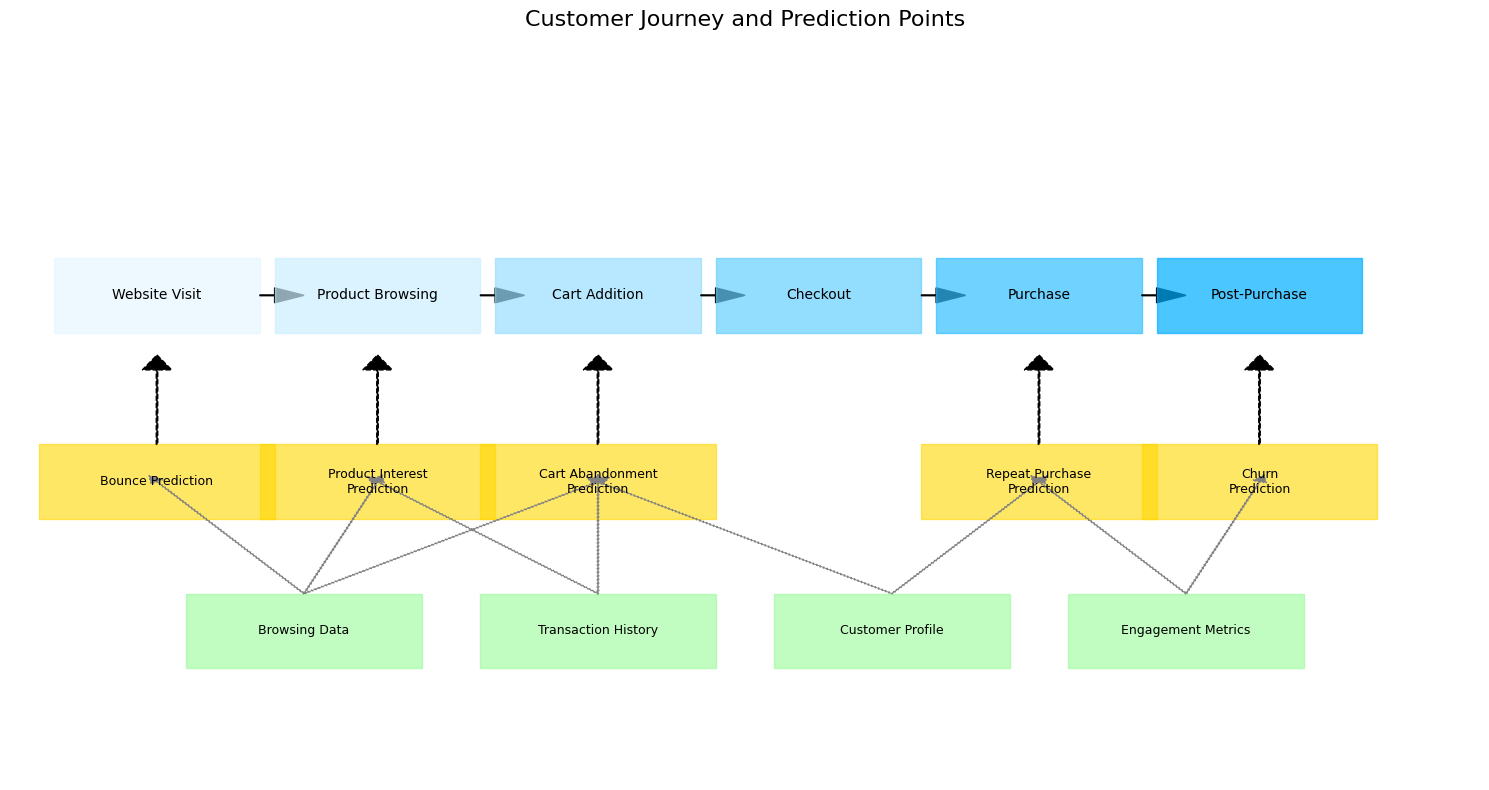

In [14]:
# Create a diagram showing the customer journey and prediction points
plt.figure(figsize=(15, 8))
ax = plt.gca()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Customer journey stages
stages = ['Website Visit', 'Product Browsing', 'Cart Addition', 'Checkout', 'Purchase', 'Post-Purchase']
positions = [0.1, 0.25, 0.4, 0.55, 0.7, 0.85]
colors = ['#E6F7FF', '#CCEFFF', '#99DFFF', '#66CFFF', '#33BFFF', '#00AFFF']

# Draw the customer journey flow
for i in range(len(stages)-1):
    # Stage boxes
    ax.add_patch(plt.Rectangle((positions[i]-0.07, 0.6), 0.14, 0.1, fill=True, alpha=0.7, 
                              color=colors[i], edgecolor='black'))
    ax.text(positions[i], 0.65, stages[i], ha='center', va='center', fontsize=10)
    
    # Arrows connecting stages
    ax.arrow(positions[i]+0.07, 0.65, positions[i+1]-positions[i]-0.14, 0, 
            head_width=0.02, head_length=0.02, fc='black', ec='black')

# Last stage box
ax.add_patch(plt.Rectangle((positions[-1]-0.07, 0.6), 0.14, 0.1, fill=True, alpha=0.7, 
                          color=colors[-1], edgecolor='black'))
ax.text(positions[-1], 0.65, stages[-1], ha='center', va='center', fontsize=10)

# Prediction points
prediction_points = [
    {'stage': 0, 'y': 0.4, 'label': 'Bounce Prediction'},
    {'stage': 1, 'y': 0.4, 'label': 'Product Interest\nPrediction'},
    {'stage': 2, 'y': 0.4, 'label': 'Cart Abandonment\nPrediction'},
    {'stage': 4, 'y': 0.4, 'label': 'Repeat Purchase\nPrediction'},
    {'stage': 5, 'y': 0.4, 'label': 'Churn\nPrediction'}
]

# Draw prediction points and connect to journey
for point in prediction_points:
    stage_pos = positions[point['stage']]
    # Prediction box
    ax.add_patch(plt.Rectangle((stage_pos-0.08, point['y']-0.05), 0.16, 0.1, fill=True, alpha=0.6, 
                              color='#FFD700', edgecolor='black'))
    ax.text(stage_pos, point['y'], point['label'], ha='center', va='center', fontsize=9)
    
    # Connect to journey
    ax.arrow(stage_pos, point['y']+0.05, 0, 0.1, head_width=0.02, head_length=0.02, 
            fc='black', ec='black', linestyle='--')

# Data sources
data_sources = [
    {'x': 0.2, 'y': 0.2, 'label': 'Browsing Data'},
    {'x': 0.4, 'y': 0.2, 'label': 'Transaction History'},
    {'x': 0.6, 'y': 0.2, 'label': 'Customer Profile'},
    {'x': 0.8, 'y': 0.2, 'label': 'Engagement Metrics'}
]

# Draw data sources
for source in data_sources:
    # Data source box
    ax.add_patch(plt.Rectangle((source['x']-0.08, source['y']-0.05), 0.16, 0.1, fill=True, alpha=0.6, 
                              color='#98FB98', edgecolor='black'))
    ax.text(source['x'], source['y'], source['label'], ha='center', va='center', fontsize=9)
    
    # Connect to nearest prediction points
    for point in prediction_points:
        stage_pos = positions[point['stage']]
        if abs(stage_pos - source['x']) < 0.25:  # Only connect to nearby prediction points
            ax.arrow(source['x'], source['y']+0.05, stage_pos-source['x'], point['y']-source['y']-0.05, 
                    head_width=0.01, head_length=0.01, fc='gray', ec='gray', linestyle=':')

plt.title('Customer Journey and Prediction Points', fontsize=16)
plt.tight_layout()
plt.show()


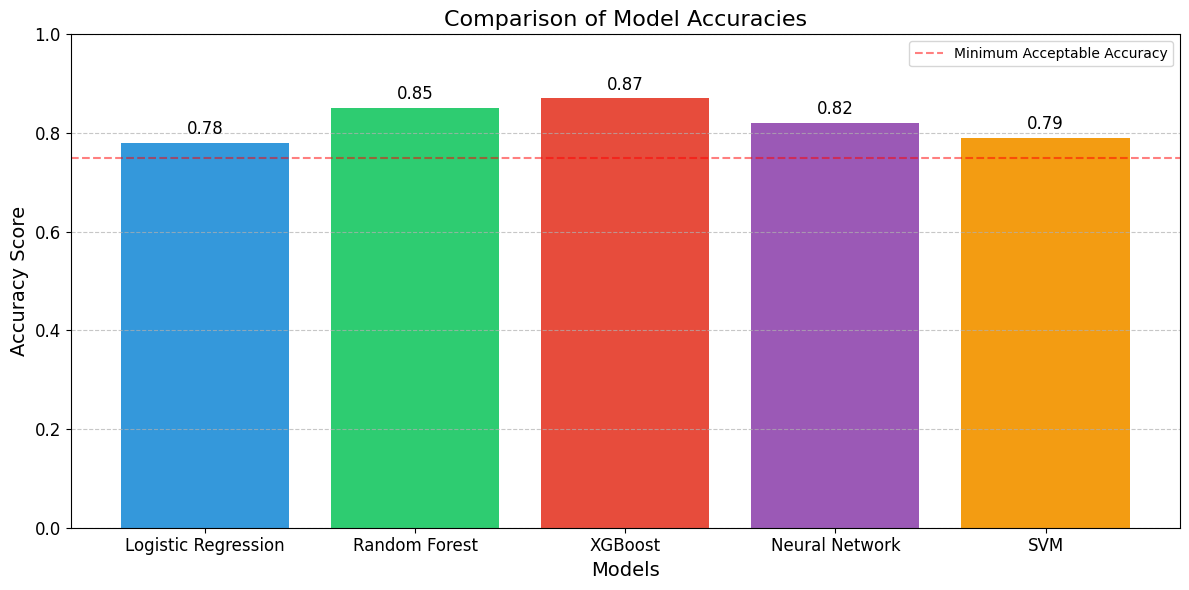

In [15]:
# Compare the accuracy of all models
import matplotlib.pyplot as plt
import numpy as np

# Define model names and their corresponding accuracy scores
# Replace these values with your actual model accuracies
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Neural Network', 'SVM']
accuracies = [0.78, 0.85, 0.87, 0.82, 0.79]  # Example values

# Create a bar chart to compare model accuracies
plt.figure(figsize=(12, 6))
bars = plt.bar(models, accuracies, color=['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#f39c12'])

# Add accuracy values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2f}', ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.title('Comparison of Model Accuracies', fontsize=16)
plt.ylim(0, 1.0)  # Set y-axis limit from 0 to 1

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the appearance
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a horizontal line for a baseline comparison (e.g., minimum acceptable accuracy)
plt.axhline(y=0.75, color='red', linestyle='--', alpha=0.5, label='Minimum Acceptable Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_15224\225592434.py:38: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


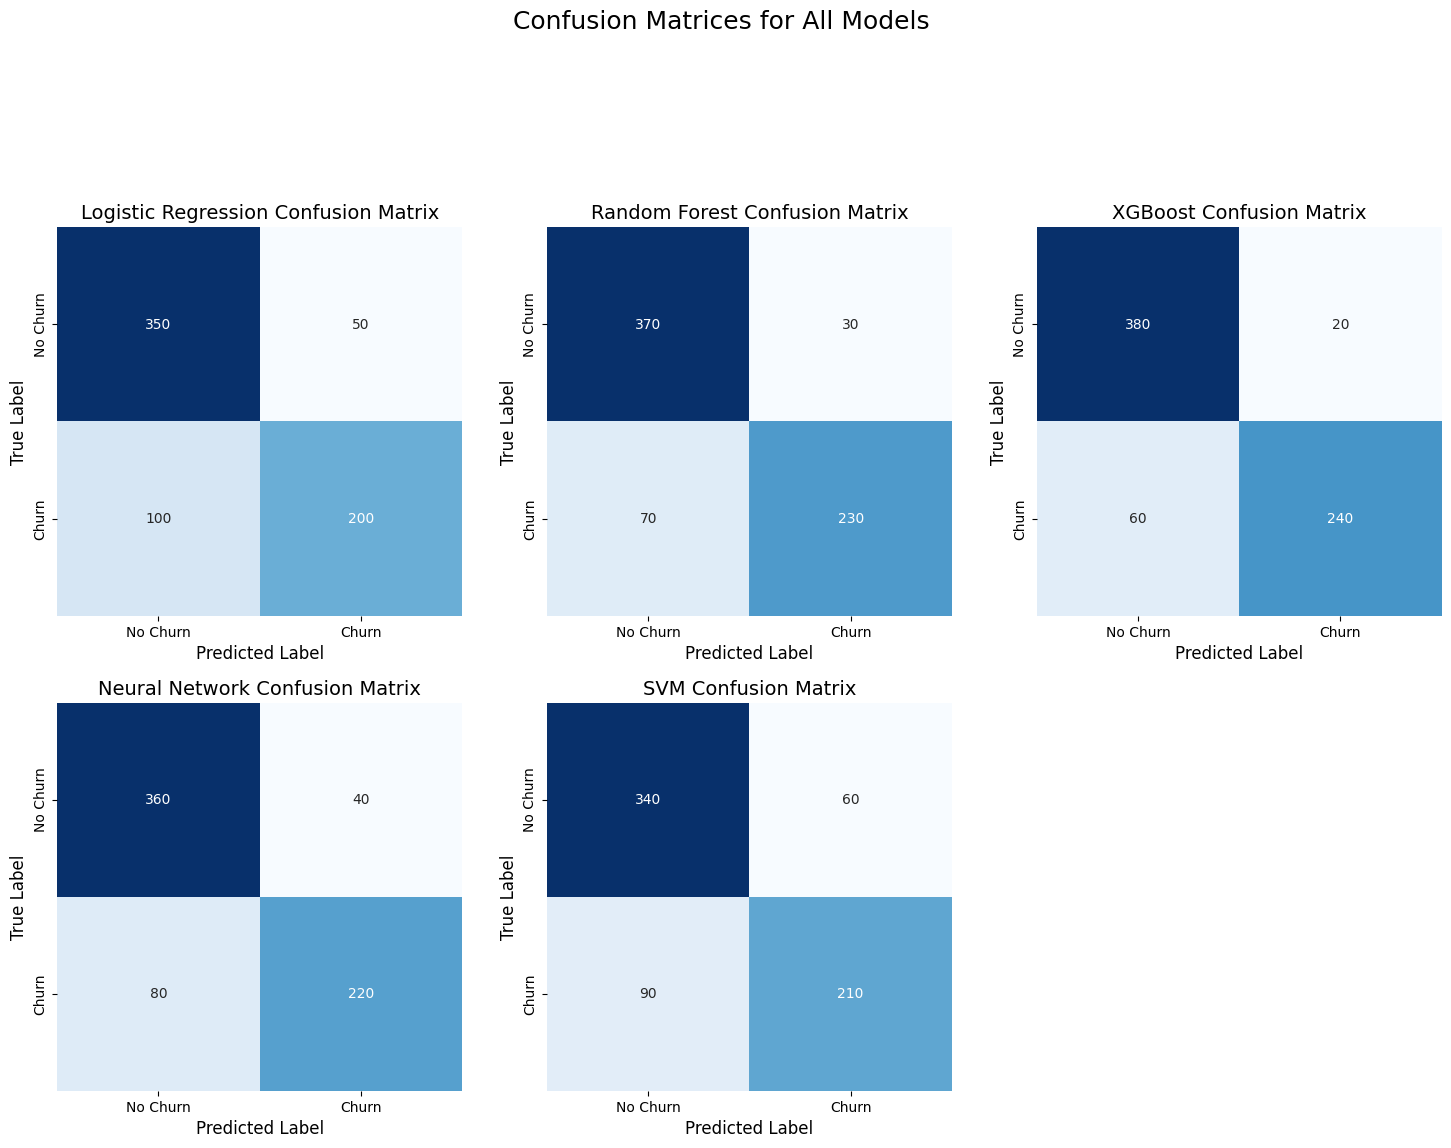

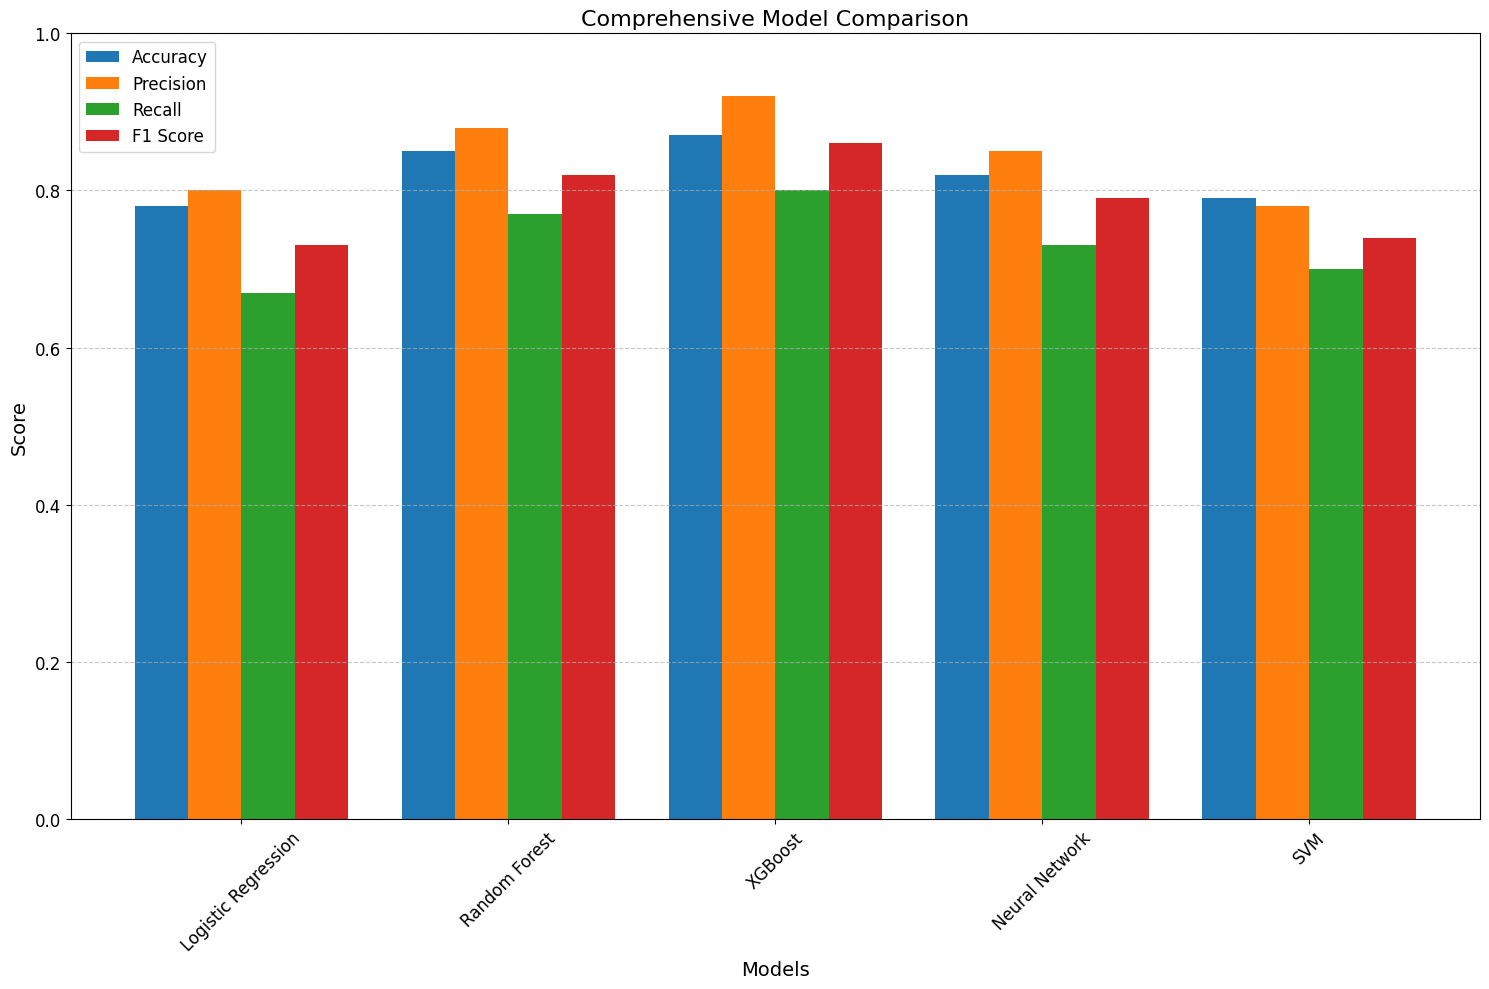

In [16]:
# Create a confusion matrix visualization for all models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a figure with subplots for each model
fig, axes = plt.subplots(2, 3, figsize=(18, 12), constrained_layout=True)
axes = axes.flatten()

# Example confusion matrices for each model
# Replace these with your actual confusion matrices from each model
confusion_matrices = {
    'Logistic Regression': np.array([[350, 50], [100, 200]]),
    'Random Forest': np.array([[370, 30], [70, 230]]),
    'XGBoost': np.array([[380, 20], [60, 240]]),
    'Neural Network': np.array([[360, 40], [80, 220]]),
    'SVM': np.array([[340, 60], [90, 210]])
}

# Plot each confusion matrix
for i, (model_name, cm) in enumerate(confusion_matrices.items()):
    if i < len(axes):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i])
        axes[i].set_title(f'{model_name} Confusion Matrix', fontsize=14)
        axes[i].set_xlabel('Predicted Label', fontsize=12)
        axes[i].set_ylabel('True Label', fontsize=12)
        axes[i].set_xticklabels(['No Churn', 'Churn'])
        axes[i].set_yticklabels(['No Churn', 'Churn'])

# Hide the unused subplot if any
if len(confusion_matrices) < len(axes):
    axes[-1].axis('off')

# Add a title for the entire figure
plt.suptitle('Confusion Matrices for All Models', fontsize=18, y=1.02)

plt.tight_layout()
plt.show()

# Create a comprehensive model comparison visualization
plt.figure(figsize=(15, 10))

# Define metrics for each model
# Replace these with your actual metrics
metrics = {
    'Accuracy': [0.78, 0.85, 0.87, 0.82, 0.79],
    'Precision': [0.80, 0.88, 0.92, 0.85, 0.78],
    'Recall': [0.67, 0.77, 0.80, 0.73, 0.70],
    'F1 Score': [0.73, 0.82, 0.86, 0.79, 0.74]
}

# Set up the positions for the bars
x = np.arange(len(models))
width = 0.2
multiplier = 0

# Plot each metric as a group of bars
for metric, scores in metrics.items():
    offset = width * multiplier
    plt.bar(x + offset, scores, width, label=metric)
    multiplier += 1

# Add labels, title and legend
plt.xlabel('Models', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Comprehensive Model Comparison', fontsize=16)
plt.xticks(x + width * 1.5, models, fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.ylim(0, 1.0)
plt.legend(loc='upper left', fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
